In [1]:
import numpy as n
import random
import pandas as pd
import gzip
import matplotlib #as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
n = 40428967  #total number of records in the clickstream data 
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size))
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')
with gzip.open('/Users/shubh/Desktop/Completed Courses/avazu-ctr-prediction/train.gz') as f:
    train = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, skiprows = skip_values)

C:\Users\shubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [4]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000679056417042096,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
1,10003539039235338011,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15699,320,50,1722,0,35,100084,79
2,10006557235872316145,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15699,320,50,1722,0,35,-1,79
3,10006789981076459409,0,2014-10-21,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,...,1,0,20596,320,50,2161,0,35,-1,157
4,10009635774586344851,0,2014-10-21,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20352,320,50,2333,0,39,-1,157


In [5]:
train.to_csv('/Users/shubh/Desktop/Completed Courses/avazu-ctr-prediction/smalltrain.csv', index = None, header=True)

In [6]:
#train

In [7]:
train['click'].value_counts()/len(train)

0    0.82955
1    0.17045
Name: click, dtype: float64

In [8]:
train[['Year','Month','Day']] = train.hour.astype(str).str.split("-",expand=True)

In [9]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C15,C16,C17,C18,C19,C20,C21,Year,Month,Day
0,10000679056417042096,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,320,50,2161,0,35,-1,157,2014,10,21 00:00:00
1,10003539039235338011,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,100084,79,2014,10,21 00:00:00
2,10006557235872316145,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,-1,79,2014,10,21 00:00:00
3,10006789981076459409,0,2014-10-21,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,...,320,50,2161,0,35,-1,157,2014,10,21 00:00:00
4,10009635774586344851,0,2014-10-21,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,320,50,2333,0,39,-1,157,2014,10,21 00:00:00


In [10]:
train[['Day','time']] = train.Day.astype(str).str.split(expand=True)

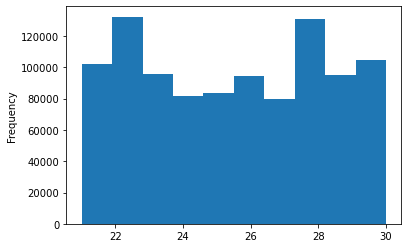

In [11]:
#Plot for DAY
train['Day'].astype(int).plot(kind='hist')
plt.show()

In [12]:
#Plot: Month 
#train['Month'].astype(int).plot(kind='hist')
#plt.show()

In [13]:
#Plot: Year
#train['Year'].astype(int).plot(kind='hist')
#plt.show()

In [14]:
print(train.Year.unique()) #Can remove 
print(train.Month.unique()) #Can remove 
print(train.time.unique())

['2014']
['10']
['00:00:00' '01:00:00' '02:00:00' '03:00:00' '04:00:00' '05:00:00'
 '06:00:00' '07:00:00' '08:00:00' '09:00:00' '10:00:00' '11:00:00'
 '12:00:00' '13:00:00' '14:00:00' '15:00:00' '16:00:00' '17:00:00'
 '18:00:00' '19:00:00' '20:00:00' '21:00:00' '22:00:00' '23:00:00']


In [15]:
train[['hours','minutes','seconds']] = train.time.astype(str).str.split(":",expand=True)
print(train.head())

                     id  click       hour    C1  banner_pos   site_id  \
0  10000679056417042096      0 2014-10-21  1005           1  fe8cc448   
1  10003539039235338011      0 2014-10-21  1005           0  1fbe01fe   
2  10006557235872316145      0 2014-10-21  1005           0  1fbe01fe   
3  10006789981076459409      0 2014-10-21  1005           0  030440fe   
4  10009635774586344851      0 2014-10-21  1005           0  543a539e   

  site_domain site_category    app_id app_domain  ... C19     C20  C21  Year  \
0    9166c161      0569f928  ecad2386   7801e8d9  ...  35      -1  157  2014   
1    f3845767      28905ebd  ecad2386   7801e8d9  ...  35  100084   79  2014   
2    f3845767      28905ebd  ecad2386   7801e8d9  ...  35      -1   79  2014   
3    08ba7db9      76b2941d  ecad2386   7801e8d9  ...  35      -1  157  2014   
4    c7ca3108      3e814130  ecad2386   7801e8d9  ...  39      -1  157  2014   

   Month  Day      time  hours  minutes  seconds  
0     10   21  00:00:00     0

In [16]:
print(train.hours.unique())
print(train.minutes.unique())
print(train.seconds.unique())

['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23']
['00']
['00']


In [17]:
del train['minutes']
del train['seconds']
del train['hour']
del train['time']

In [18]:
train.head()

,id,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C16,C17,C18,C19,C20,C21,Year,Month,Day,hours
0,10000679056417042096,0,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,...,50,2161,0,35,-1,157,2014,10,21,00
1,10003539039235338011,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,50,1722,0,35,100084,79,2014,10,21,00
2,10006557235872316145,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,50,1722,0,35,-1,79,2014,10,21,00
3,10006789981076459409,0,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,07d7df22,...,50,2161,0,35,-1,157,2014,10,21,00
4,10009635774586344851,0,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,07d7df22,...,50,2333,0,39,-1,157,2014,10,21,00


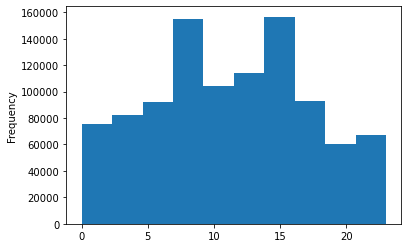

In [19]:
#Plot: hours
train['hours'].astype(int).plot(kind='hist')
plt.show()

In [20]:
#EDA

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   id                1000000 non-null  uint64
 1   click             1000000 non-null  int64 
 2   C1                1000000 non-null  int64 
 3   banner_pos        1000000 non-null  int64 
 4   site_id           1000000 non-null  object
 5   site_domain       1000000 non-null  object
 6   site_category     1000000 non-null  object
 7   app_id            1000000 non-null  object
 8   app_domain        1000000 non-null  object
 9   app_category      1000000 non-null  object
 10  device_id         1000000 non-null  object
 11  device_ip         1000000 non-null  object
 12  device_model      1000000 non-null  object
 13  device_type       1000000 non-null  int64 
 14  device_conn_type  1000000 non-null  int64 
 15  C14               1000000 non-null  int64 
 16  C15               1

In [22]:
df2 = train[[column for column in train if train[column].count() / len(train) >= 0.3]]

In [23]:
df2
print("List of dropped columns:", end=" ")
for c in train.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')

List of dropped columns: 



In [24]:
train[["Year", "Month", "Day", "hours"]] = train[["Year", "Month", "Day", "hours"]].apply(pd.to_numeric)

In [25]:
print(type(train['Year']))
print(type(train['Month']))
print(type(train['Day']))
print(type(train['hours']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [26]:
list(set(train.dtypes.tolist()))

[dtype('O'), dtype('uint64'), dtype('int64')]

In [27]:
train_num = train.select_dtypes(include = ['float64', 'int64'])
train_num.head()

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,Year,Month,Day,hours
0,0,1005,1,1,0,18993,320,50,2161,0,35,-1,157,2014,10,21,0
1,0,1005,0,1,0,15699,320,50,1722,0,35,100084,79,2014,10,21,0
2,0,1005,0,1,0,15699,320,50,1722,0,35,-1,79,2014,10,21,0
3,0,1005,0,1,0,20596,320,50,2161,0,35,-1,157,2014,10,21,0
4,0,1005,0,1,0,20352,320,50,2333,0,39,-1,157,2014,10,21,0


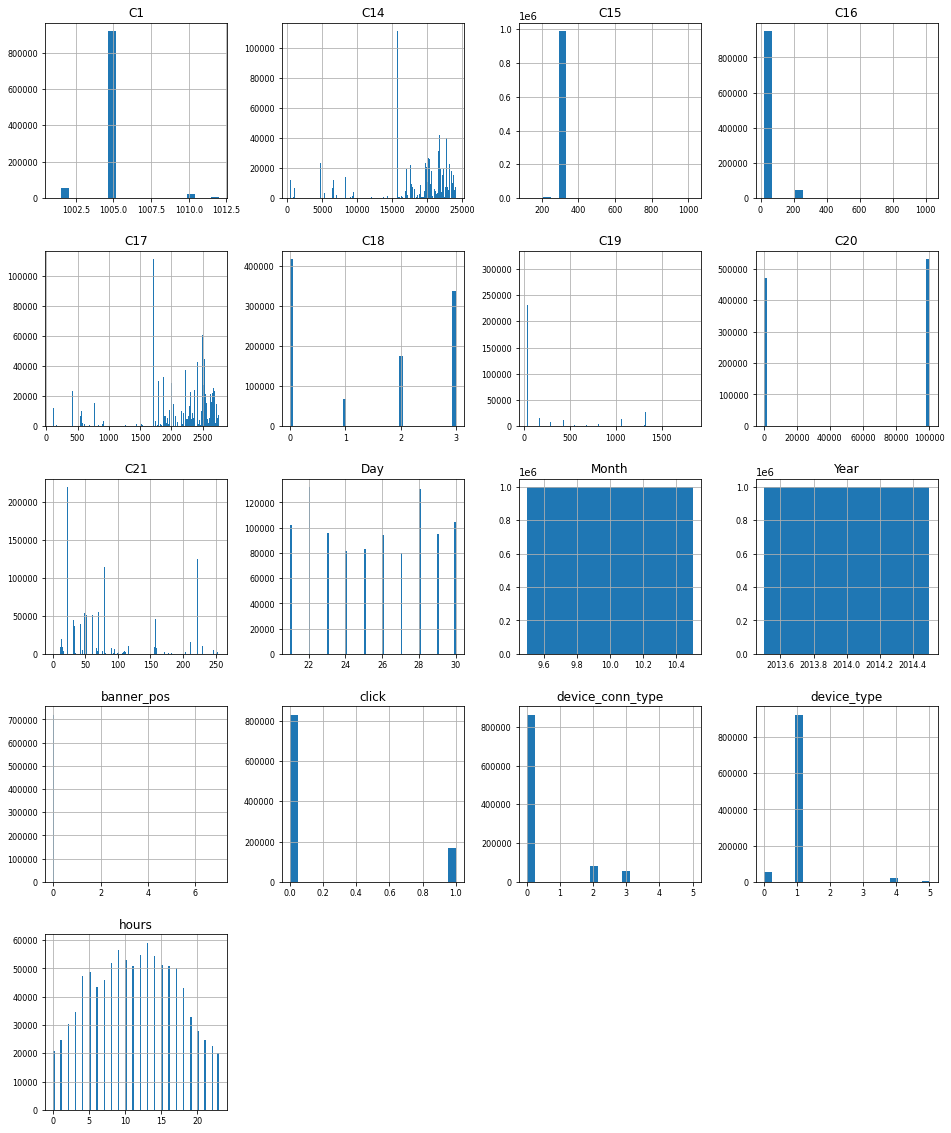

In [28]:
train_num.hist(figsize=(16, 20), bins='auto', xlabelsize=8, ylabelsize=8);

In [29]:
#Correlation

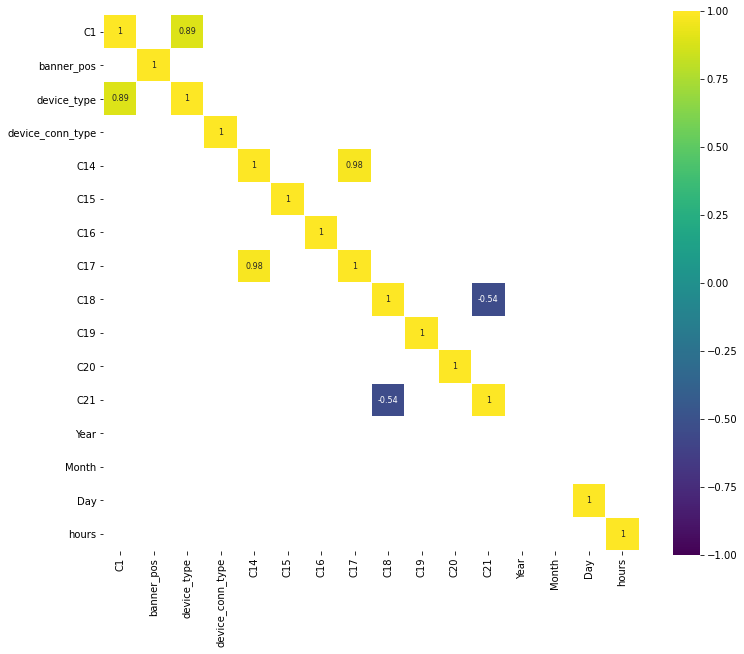

In [30]:
corr = train_num.drop('click', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [31]:
quantitative_features_list = ['banner_pos', 'Year', 'Month', 'Day', 'hours', 'device_type', 'device_conn_type', 
                              'C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
train_quantitative_values = train[quantitative_features_list]
train_quantitative_values.head()

,banner_pos,Year,Month,Day,hours,device_type,device_conn_type,C1,C14,C15,C16,C17,C18,C19,C20,C21
0,1,2014,10,21,0,1,0,1005,18993,320,50,2161,0,35,-1,157
1,0,2014,10,21,0,1,0,1005,15699,320,50,1722,0,35,100084,79
2,0,2014,10,21,0,1,0,1005,15699,320,50,1722,0,35,-1,79
3,0,2014,10,21,0,1,0,1005,20596,320,50,2161,0,35,-1,157
4,0,2014,10,21,0,1,0,1005,20352,320,50,2333,0,39,-1,157


In [32]:
def CTR(feature):
    df_click = train[train['click'] == 1]
    train_fc = train['click']
    train_fc.append(feature)
    df_c1 = train_fc.groupby(feature).count().reset_index()
    df_c1 = df_c1.rename(columns={'click': 'impressions'})
    df_clicks = df_click['click']
    df_clicks.append(feature)
    df_c1['clicks'] = df_clicks.groupby(feature).count().reset_index()['click']
    df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100
    del df_c1['impressions']
    del df_c1['clicks']
    df_c1.set_index(df_c1.iloc[0:,0],drop=True,inplace=True)
    df_c1.plot.bar(y='CTR', rot=0, color='red')
    #print(df_c1)
    return df_c1['CTR']

banner_pos
0    16.472872
1    18.477733
2    12.012012
3    10.714286
4    17.989418
5    12.781955
7    32.248804
Name: CTR, dtype: float64


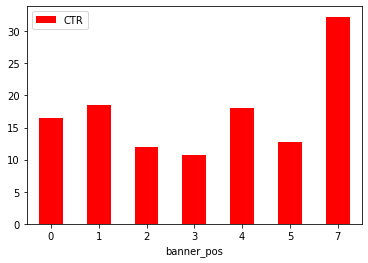

In [33]:
print(CTR(train['banner_pos']))

device_type
0    20.822112
1    17.007292
4     9.354586
5     9.019731
Name: CTR, dtype: float64


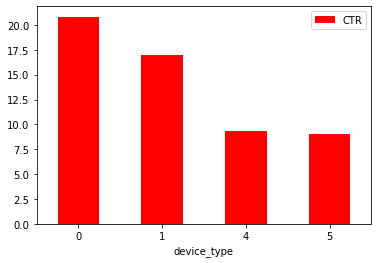

In [34]:
print(CTR(train['device_type']))

device_conn_type
0    18.195656
2    13.464019
3     4.430333
5     2.529183
Name: CTR, dtype: float64


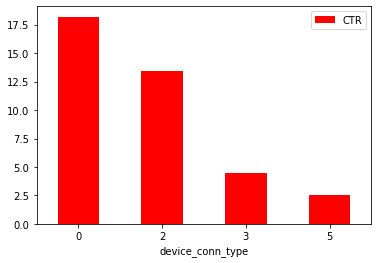

In [35]:
print(CTR(train['device_conn_type']))

C1
1001     3.673469
1002    20.822112
1005    17.022029
1007     3.187721
1008    13.432836
1010     9.306700
1012    17.678008
Name: CTR, dtype: float64


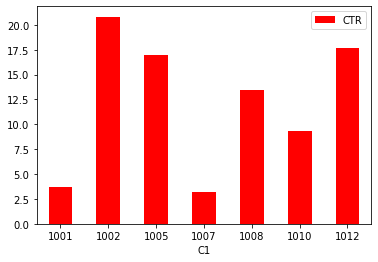

In [36]:
print(CTR(train['C1']))

C15
120      1.351351
216     13.470874
300     36.236459
320     15.901246
480     35.714286
728      5.277476
768     46.666667
1024    32.258065
Name: CTR, dtype: float64


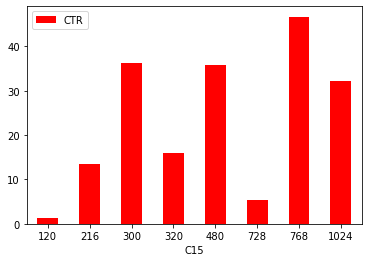

In [37]:
print(CTR(train['C15']))

C16
20       1.351351
36      13.470874
50      15.875565
90       5.277476
250     42.578318
320     35.714286
480     20.914513
768     32.258065
1024    46.666667
Name: CTR, dtype: float64


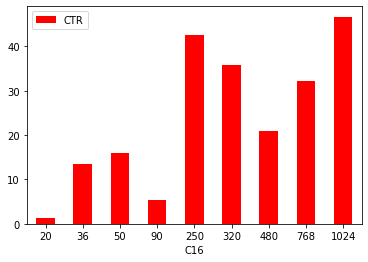

In [38]:
print(CTR(train['C16']))

C18
0    15.933669
1     3.434451
2    29.500605
3    14.648529
Name: CTR, dtype: float64


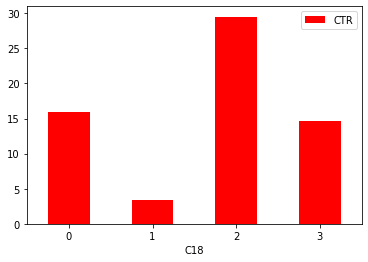

In [39]:
print(CTR(train['C18']))

In [40]:
#mpl.rcParams['agg.path.chunksize'] = 10000

In [41]:
def impressions(feature):
    impressions = feature.value_counts()/len(train)
    df = train.groupby([feature,'click'])
    df = df.size().unstack()
    fig, axs = plt.subplots(2)
    
    df[0].plot(ax=axs[0], kind='bar',rot=0, color="blue")
    axs[0].legend(loc=0)
    df[1].plot(ax=axs[1], kind='bar',rot=0, color="pink")
    axs[1].legend(loc=0)
    return impressions

0    0.720093
1    0.278151
7    0.001045
2    0.000333
4    0.000189
5    0.000133
3    0.000056
Name: banner_pos, dtype: float64


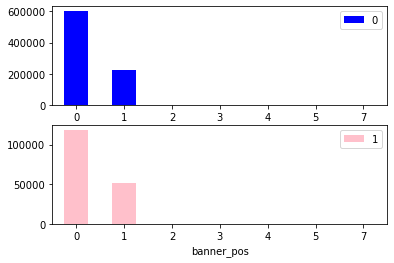

In [42]:
print(impressions(train['banner_pos']))

1    0.922716
0    0.054956
4    0.019135
5    0.003193
Name: device_type, dtype: float64


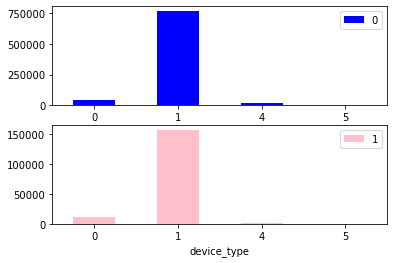

In [43]:
print(impressions(train['device_type']))

0    0.862618
2    0.082182
3    0.054172
5    0.001028
Name: device_conn_type, dtype: float64


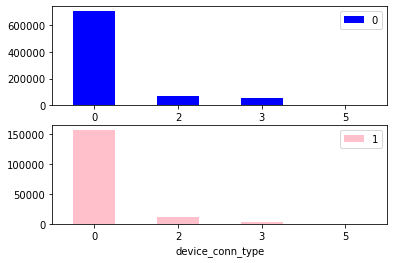

In [44]:
print(impressions(train['device_conn_type']))

1005    0.918639
1002    0.054956
1010    0.022328
1012    0.002851
1007    0.000847
1001    0.000245
1008    0.000134
Name: C1, dtype: float64


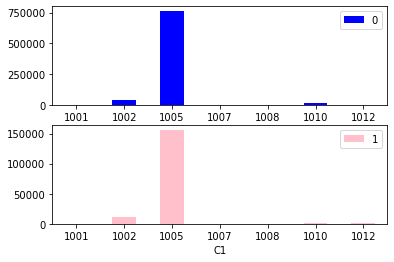

In [45]:
print(impressions(train['C1']))

320     0.932537
300     0.057972
216     0.007416
728     0.001838
120     0.000074
1024    0.000062
480     0.000056
768     0.000045
Name: C15, dtype: float64


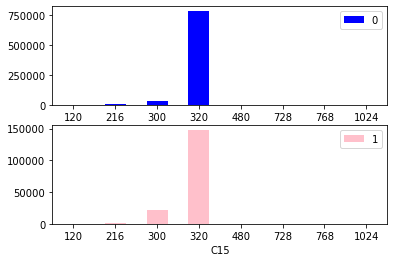

In [46]:
print(impressions(train['C15']))

50      0.943368
250     0.044626
36      0.007416
480     0.002515
90      0.001838
20      0.000074
768     0.000062
320     0.000056
1024    0.000045
Name: C16, dtype: float64


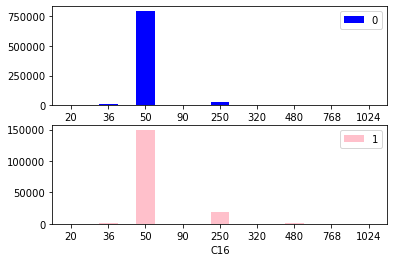

In [47]:
print(impressions(train['C16']))

0    0.418510
3    0.338150
2    0.175993
1    0.067347
Name: C18, dtype: float64


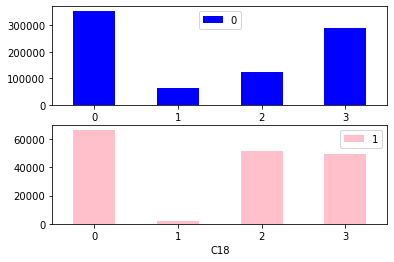

In [48]:
print(impressions(train['C18']))